<a href="https://colab.research.google.com/github/jinijinijin/Judgment-of-Eye-Disease-for-dogs/blob/main/gimar_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:

# 기본 경로
base_dir = '/content/drive/MyDrive/반려견 100'

train_dir = os.path.join(base_dir, 'train_병')
validation_dir = os.path.join(base_dir, 'test_병') #validation임

# 훈련에 사용되는 고양이/개 이미지 경로
train_1_dir = os.path.join(train_dir, '/content/drive/MyDrive/반려견 100/test_병/test_각막염100')
train_2_dir = os.path.join(train_dir, '/content/drive/MyDrive/반려견 100/test_병/test_결막염100')
train_3_dir = os.path.join(train_dir, '/content/drive/MyDrive/반려견 100/test_병/test_백내장100')
print(train_1_dir)
print(train_2_dir)
print(train_3_dir)
# 테스트에 사용되는 고양이/개 이미지 경로
validation_1_dir = os.path.join(validation_dir, '/content/drive/MyDrive/반려견 100/test_병/test_각막염100')
validation_2_dir = os.path.join(validation_dir, '/content/drive/MyDrive/반려견 100/test_병/test_결막염100')
validation_3_dir = os.path.join(validation_dir, '/content/drive/MyDrive/반려견 100/test_병/test_백내장100')
print(validation_1_dir)
print(validation_2_dir)
print(validation_3_dir)

/content/drive/MyDrive/반려견 100/test_병/test_각막염100
/content/drive/MyDrive/반려견 100/test_병/test_결막염100
/content/drive/MyDrive/반려견 100/test_병/test_백내장100
/content/drive/MyDrive/반려견 100/test_병/test_각막염100
/content/drive/MyDrive/반려견 100/test_병/test_결막염100
/content/drive/MyDrive/반려견 100/test_병/test_백내장100


In [38]:
train_1_fnames = os.listdir( train_1_dir )
train_2_fnames = os.listdir( train_2_dir )
train_3_fnames = os.listdir( train_2_dir )

print(train_1_fnames[:5])
print(train_2_fnames[:5])
print(train_3_fnames[:5])

['crop_D1_18f8a058-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D1_210c55ab-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D0_212168a2-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D1_3b514458-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D1_2132f2e4-60a5-11ec-8402-0a7404972c70.jpg']
['crop_D0_1904e60e-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D0_1907d9b0-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D0_1909590b-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D0_194136ec-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D0_21057b05-60a5-11ec-8402-0a7404972c70.jpg']
['crop_D0_1904e60e-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D0_1907d9b0-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D0_1909590b-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D0_194136ec-60a5-11ec-8402-0a7404972c70.jpg', 'crop_D0_21057b05-60a5-11ec-8402-0a7404972c70.jpg']


In [39]:
print('Total training 1 images :', len(os.listdir(train_1_dir)))
print('Total training 2 images :', len(os.listdir(train_2_dir)))
print('Total training 3 images :', len(os.listdir(train_3_dir)))

print('Total validation 1 images :', len(os.listdir(validation_1_dir)))
print('Total validation 2 images :', len(os.listdir(validation_2_dir)))
print('Total validation 3 images :', len(os.listdir(validation_3_dir)))

Total training 1 images : 100
Total training 2 images : 100
Total training 3 images : 100
Total validation 1 images : 100
Total validation 2 images : 100
Total validation 3 images : 100


FileNotFoundError: ignored

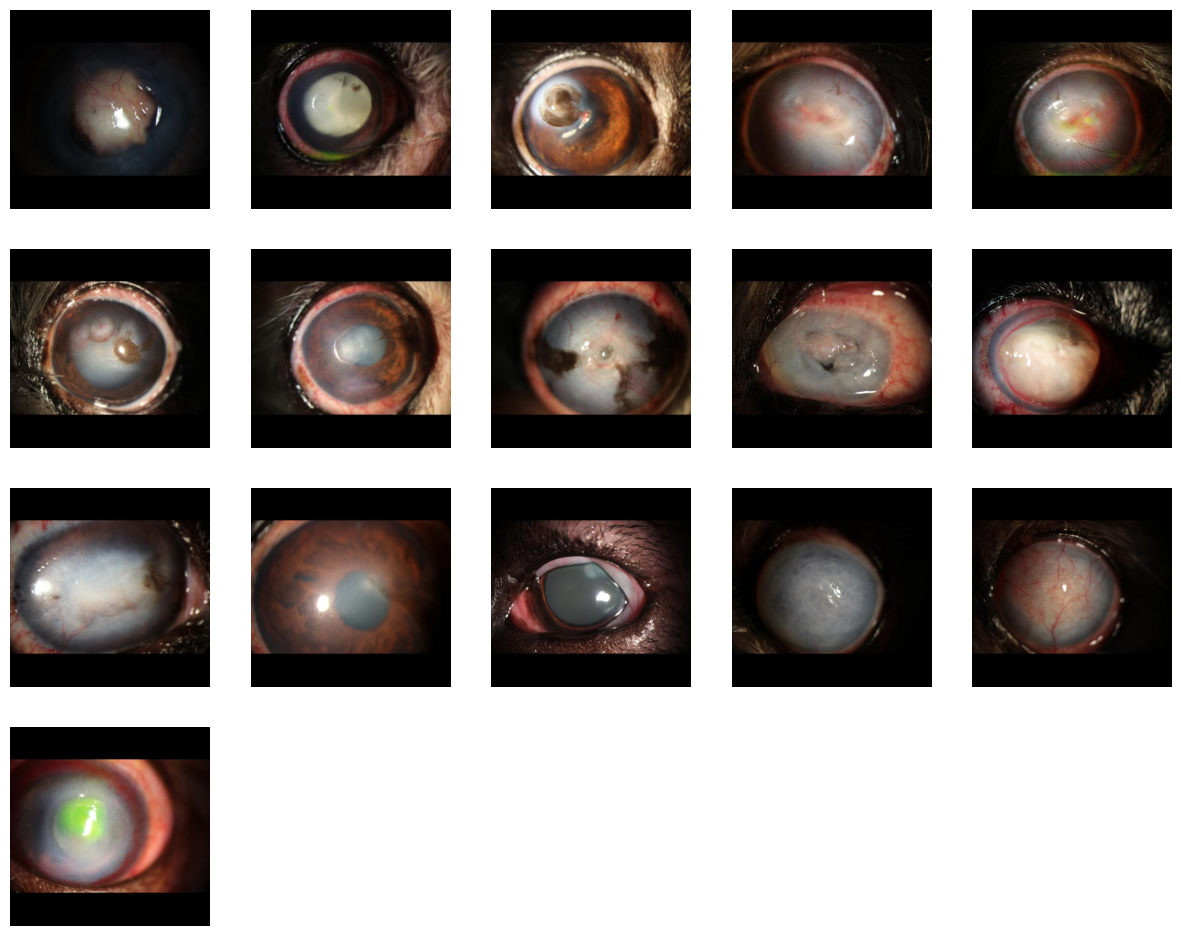

In [40]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 5, 5
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_1_pix = [os.path.join(train_1_dir, fname)
                           for fname in train_1_fnames[pic_index-8:pic_index]]

next_2_pix = [os.path.join(train_2_dir, fname)
                     for fname in train_2_fnames[pic_index-8:pic_index]]

next_3_pix = [os.path.join(train_3_dir, fname)
                          for fname in train_3_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_1_pix + next_2_pix + next_3_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [46]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 67500)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                4320064   
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,322,177
Trainable params: 4,322,177
Non-trainable params: 0
_________________________________________________________________


In [47]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [49]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=2
)

Epoch 1/100
15/15 - 6s - loss: -2.0127e-01 - accuracy: 0.3333 - val_loss: -1.2108e+01 - val_accuracy: 0.3367 - 6s/epoch - 379ms/step
Epoch 2/100
15/15 - 3s - loss: -1.2039e+01 - accuracy: 0.3267 - val_loss: -2.4705e+01 - val_accuracy: 0.3400 - 3s/epoch - 214ms/step
Epoch 3/100
15/15 - 4s - loss: -2.5419e+01 - accuracy: 0.3400 - val_loss: -4.2698e+01 - val_accuracy: 0.3400 - 4s/epoch - 282ms/step
Epoch 4/100
15/15 - 4s - loss: -4.4198e+01 - accuracy: 0.3433 - val_loss: -6.3474e+01 - val_accuracy: 0.3367 - 4s/epoch - 287ms/step
Epoch 5/100
15/15 - 3s - loss: -7.2145e+01 - accuracy: 0.3367 - val_loss: -9.1102e+01 - val_accuracy: 0.3433 - 3s/epoch - 217ms/step
Epoch 6/100
15/15 - 5s - loss: -1.0328e+02 - accuracy: 0.3400 - val_loss: -1.2664e+02 - val_accuracy: 0.3467 - 5s/epoch - 305ms/step
Epoch 7/100
15/15 - 4s - loss: -1.4602e+02 - accuracy: 0.3367 - val_loss: -1.6376e+02 - val_accuracy: 0.3433 - 4s/epoch - 286ms/step
Epoch 8/100
15/15 - 5s - loss: -1.8598e+02 - accuracy: 0.3333 - val_l

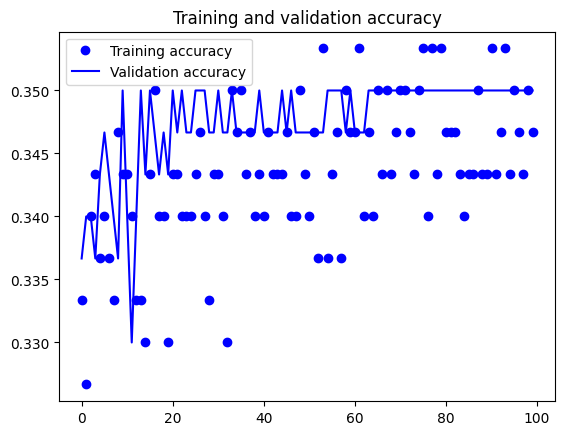

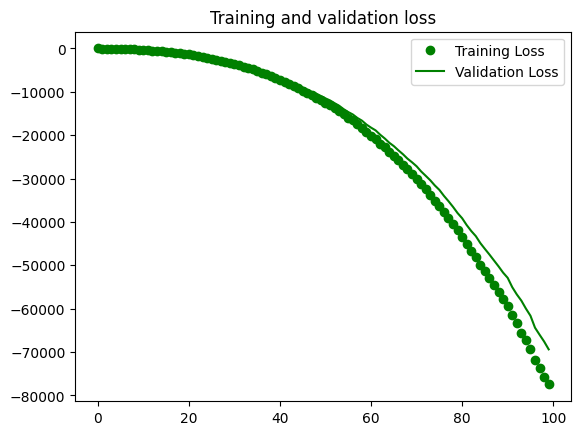

In [50]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [51]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_preprocessed = preprocess_input(img_array)
    img_expanded = np.expand_dims(img_preprocessed, axis=0)

    classes = model.predict(img_expanded)

    class_labels = ["결막염", "백내장", "색소침착"]
    predicted_class_index = np.argmax(classes[0])
    predicted_class = class_labels[predicted_class_index]

    print(fn + "의 예측 결과: " + predicted_class)

Saving crop_D0_1841933b-60a5-11ec-8402-0a7404972c70.jpg to crop_D0_1841933b-60a5-11ec-8402-0a7404972c70.jpg
1/1 [==============================] - 0s 106ms/step
crop_D0_1841933b-60a5-11ec-8402-0a7404972c70.jpg의 예측 결과: 결막염
